# IEEE Coders Week
### Day 5 : Twitter Sentiment Analysis (Natural Language Processing)
#### By : Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer**

All of the work result below is done by me, based on every resources that have been given. Please contact me if you have any good suggestion.


# Taking tweets from @CNN Twitter Account

### Import Important Library

In [1]:
!pip install GetOldTweets3

In [0]:
import GetOldTweets3 as got
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from textblob import TextBlob

### Creating dataset using GetOldTweets Module

Taking tweets from @CNN Twitter Account

In [0]:
def username_tweets_to_csv(username, count):
  tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
  .setMaxTweets(count)
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  user_tweets = [[tweet.date, tweet.text] for tweet in tweets]
  tweets_df = pd.DataFrame(user_tweets, columns = ['Datetime', 'Text'])
  tweets_df.to_csv('{}-{}k-tweets.csv'.format(username, int(count/1000)), sep=',')

In [0]:
#Taking 1000 tweets from CNN twitter
username = 'cnn'
count = 1000

username_tweets_to_csv(username, count)

### Dataset Information

In [5]:
!ls /content/*.csv

/content/cnn-1k-tweets.csv


In [6]:
df = pd.read_csv('/content/cnn-1k-tweets.csv')
df.head(100)

,Unnamed: 0,Datetime,Text
0,0,2020-06-06 18:22:03+00:00,Invoking George Floyd's name while speaking Fr...
1,1,2020-06-06 18:12:01+00:00,Some have only found sadness in canceled Pride...
2,2,2020-06-06 18:02:06+00:00,The daughter of the acting head of the US Agen...
3,3,2020-06-06 18:00:37+00:00,“I just want to do something. Music is the per...
4,4,2020-06-06 17:55:05+00:00,Coronavirus-related cases and deaths across La...
...,...,...,...
95,95,2020-06-05 23:54:20+00:00,Republicans argued that the surprising improve...
96,96,2020-06-05 23:42:48+00:00,The cocker spaniel belonging to the white woma...
97,97,2020-06-05 23:40:06+00:00,A warehouse that operates as an Amazon distrib...
98,98,2020-06-05 23:35:22+00:00,Canadian Prime Minister Justin Trudeau took a ...


In [7]:
df = df.drop(columns='Unnamed: 0', axis=1)

df.describe()

,Datetime,Text
count,1000,1000
unique,994,888
top,2020-06-03 20:34:31+00:00,"""He didn't give me an opportunity to even spea..."
freq,3,5


### Tweets Sentiment Analysis using TextBlob

In [8]:
Sentiment = []
SentimentS = []
Statement = []
StatementS = []

i = 0

while (i < len(df['Text'])):
  sample = df['Text'][i]
  analysis = TextBlob(sample)

  if (analysis.sentiment.polarity >= 0.5):
    data1 = "Positive"
  elif (analysis.sentiment.polarity <= -0.5):
    data1 = "Negative"
  else:
    data1 = "Neutral"

  if (analysis.sentiment.subjectivity >= 0.6):
    data2 = "Subjective"
  elif (analysis.sentiment.subjectivity <= 0.4):
    data2 = "Objective"
  else :
    data2 = "Neutral"

  Sentiment.append(data1)
  Statement.append(data2)
  SentimentS.append(analysis.sentiment.polarity)
  StatementS.append(analysis.sentiment.subjectivity)
  i += 1
else :
  print("Done!")

Done!


In [9]:
df['Sentiment'] = Sentiment
df['Sentiment_Score'] = SentimentS
df['Statement'] = Statement
df['Statement_Score'] = StatementS

df.head()

,Datetime,Text,Sentiment,Sentiment_Score,Statement,Statement_Score
0,2020-06-06 18:22:03+00:00,Invoking George Floyd's name while speaking Fr...,Positive,0.500000,Subjective,1.000000
1,2020-06-06 18:12:01+00:00,Some have only found sadness in canceled Pride...,Neutral,0.000000,Subjective,1.000000
2,2020-06-06 18:02:06+00:00,The daughter of the acting head of the US Agen...,Neutral,0.000000,Objective,0.100000
3,2020-06-06 18:00:37+00:00,“I just want to do something. Music is the per...,Positive,1.000000,Subjective,1.000000
4,2020-06-06 17:55:05+00:00,Coronavirus-related cases and deaths across La...,Neutral,0.148148,Objective,0.396296


### Visualizing Result

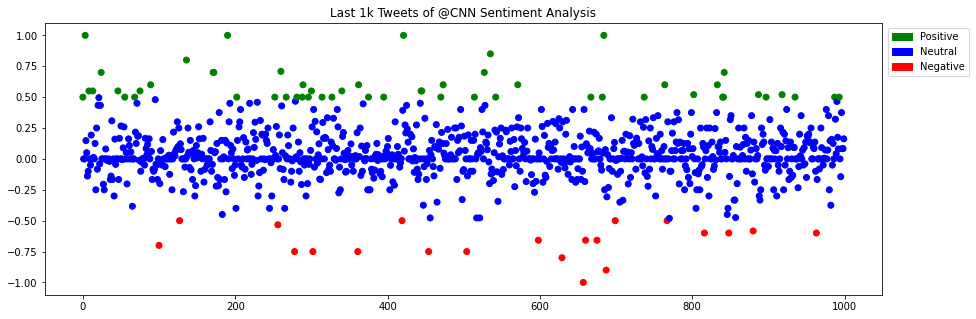

Positive total =  55
Negative total =  21
Neutral total =  924


In [10]:
color = np.where(df["Sentiment"]== "Positive",'g',
                 np.where(df["Sentiment"]== "Negative",'r','b'))

plt.figure(figsize = (15,5))
plt.title('Last 1k Tweets of @CNN Sentiment Analysis')
plt.scatter(df['Sentiment_Score'].index, df['Sentiment_Score'], c=color)
rp = mpatches.Patch(color='red', label='Negative')
gp = mpatches.Patch(color='green', label='Positive')
bp = mpatches.Patch(color='blue', label='Neutral')
plt.legend(handles=[gp,bp,rp], bbox_to_anchor=(1.11, 1))
plt.show()

print("Positive total = ", df[(df['Sentiment'] == "Positive")]["Sentiment"].count())
print("Negative total = ", df[(df['Sentiment'] == "Negative")]["Sentiment"].count())
print("Neutral total = ", df[(df['Sentiment'] == "Neutral")]["Sentiment"].count())

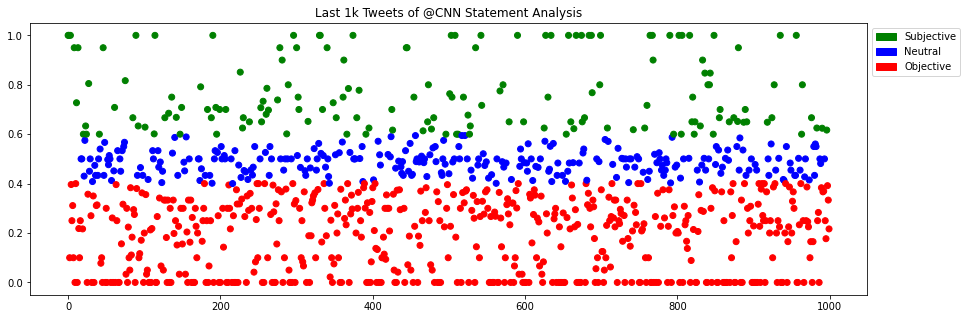

Objective total =  563
Subjective total =  160
Neutral total =  277


In [11]:
color = np.where(df["Statement"]== "Subjective",'g',
                 np.where(df["Statement"]== "Objective",'r','b'))

plt.figure(figsize = (15,5))
plt.title('Last 1k Tweets of @CNN Statement Analysis')
plt.scatter(df['Statement_Score'].index, df['Statement_Score'], c=color)
rp = mpatches.Patch(color='red', label='Objective')
gp = mpatches.Patch(color='green', label='Subjective')
bp = mpatches.Patch(color='blue', label='Neutral')
plt.legend(handles=[gp,bp,rp], bbox_to_anchor=(1, 1))
plt.show()

print("Objective total = ", df[(df['Statement'] == "Objective")]["Statement"].count())
print("Subjective total = ", df[(df['Statement'] == "Subjective")]["Statement"].count())
print("Neutral total = ", df[(df['Statement'] == "Neutral")]["Statement"].count())

We can conclude that @CNN last 1k Tweets is Neutral but more Objective (Media news company have they're own sentiment)

Let's do it one more time with different account!

# Taking tweets from @KevinHart4real Twitter Account

In [0]:
#Taking 1000 tweets from CNN twitter
username = 'KevinHart4real'
count = 700

username_tweets_to_csv(username, count)

### Dataset Information

In [13]:
!ls /content/*.csv

/content/cnn-1k-tweets.csv  /content/KevinHart4real-0k-tweets.csv


In [14]:
df1 = pd.read_csv('/content/KevinHart4real-0k-tweets.csv')
df1.head(100)

,Unnamed: 0,Datetime,Text
0,0,2020-06-05 15:44:45+00:00,Go get you a copy of “The Decision” today damn...
1,1,2020-06-03 18:58:16+00:00,This is an amazing display of justice....This ...
2,2,2020-06-03 00:24:24+00:00,This is POWER.....Enough is Enough. It’s time ...
3,3,2020-06-02 16:07:59+00:00,The Change starts with our VOTE!!!! https://ww...
4,4,2020-06-02 05:36:45+00:00,Just posted a photo https://www.instagram.com/...
...,...,...,...
95,95,2020-05-01 04:50:58+00:00,I’m releasing my Audible Original “The Decisio...
96,96,2020-04-30 16:07:51+00:00,I’m dropping my audiobook early people.....I’m...
97,97,2020-04-30 15:39:19+00:00,Good morning world....Sending love & energy yo...
98,98,2020-04-30 09:17:59+00:00,Such an amazing display of creativity man....S...


In [15]:
df1 = df1.drop(columns='Unnamed: 0', axis=1)

df1.describe()

,Datetime,Text
count,700,700
unique,700,686
top,2019-08-02 17:06:20+00:00,#TheDecision
freq,1,9


### Tweets Sentiment Analysis using TextBlob

In [16]:
Sentiment = []
SentimentS = []
Statement = []
StatementS = []

i = 0

while (i < len(df1['Text'])):
  samples = df1['Text'][i]
  analysis = TextBlob(samples)

  if (analysis.sentiment.polarity >= 0.5):
    data1 = "Positive"
  elif (analysis.sentiment.polarity <= -0.5):
    data1 = "Negative"
  else:
    data1 = "Neutral"

  if (analysis.sentiment.subjectivity >= 0.6):
    data2 = "Subjective"
  elif (analysis.sentiment.subjectivity <= 0.4):
    data2 = "Objective"
  else :
    data2 = "Neutral"

  Sentiment.append(data1)
  Statement.append(data2)
  SentimentS.append(analysis.sentiment.polarity)
  StatementS.append(analysis.sentiment.subjectivity)
  i += 1
else :
  print("Done!")

Done!


In [17]:
df1['Sentiment'] = Sentiment
df1['Sentiment_Score'] = SentimentS
df1['Statement'] = Statement
df1['Statement_Score'] = StatementS

df1.head()

,Datetime,Text,Sentiment,Sentiment_Score,Statement,Statement_Score
0,2020-06-05 15:44:45+00:00,Go get you a copy of “The Decision” today damn...,Neutral,0.350000,Objective,0.250000
1,2020-06-03 18:58:16+00:00,This is an amazing display of justice....This ...,Neutral,0.439683,Subjective,0.723016
2,2020-06-03 00:24:24+00:00,This is POWER.....Enough is Enough. It’s time ...,Neutral,0.000000,Neutral,0.500000
3,2020-06-02 16:07:59+00:00,The Change starts with our VOTE!!!! https://ww...,Neutral,0.000000,Objective,0.000000
4,2020-06-02 05:36:45+00:00,Just posted a photo https://www.instagram.com/...,Neutral,0.000000,Objective,0.000000


### Visualizing Result

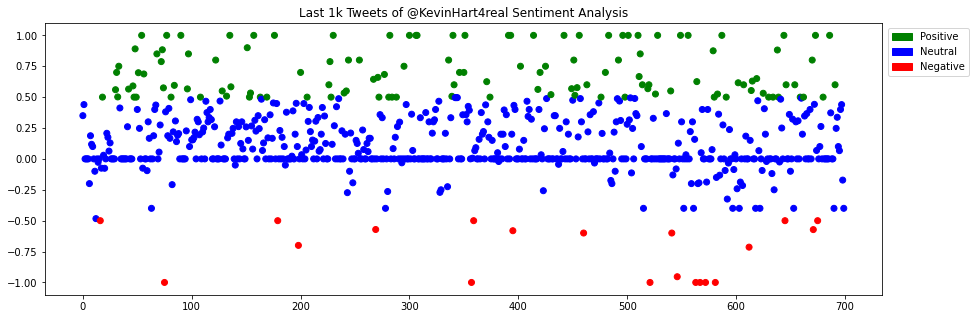

Positive total =  126
Negative total =  20
Neutral total =  554


In [18]:
color = np.where(df1["Sentiment"]== "Positive",'g',
                 np.where(df1["Sentiment"]== "Negative",'r','b'))

plt.figure(figsize = (15,5))
plt.title('Last 1k Tweets of @KevinHart4real Sentiment Analysis')
plt.scatter(df1['Sentiment_Score'].index, df1['Sentiment_Score'], c=color)
rp = mpatches.Patch(color='red', label='Negative')
gp = mpatches.Patch(color='green', label='Positive')
bp = mpatches.Patch(color='blue', label='Neutral')
plt.legend(handles=[gp,bp,rp], bbox_to_anchor=(1.11, 1))
plt.show()

print("Positive total = ", df1[(df1['Sentiment'] == "Positive")]["Sentiment"].count())
print("Negative total = ", df1[(df1['Sentiment'] == "Negative")]["Sentiment"].count())
print("Neutral total = ", df1[(df1['Sentiment'] == "Neutral")]["Sentiment"].count())

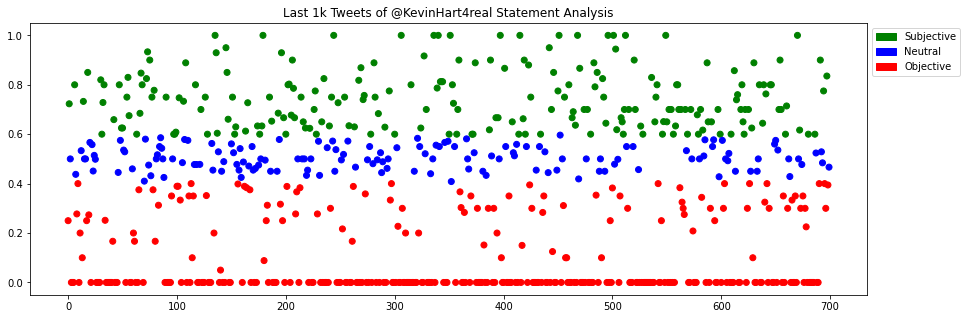

Objective total =  332
Subjective total =  218
Neutral total =  150


In [20]:
color = np.where(df1["Statement"]== "Subjective",'g',
                 np.where(df1["Statement"]== "Objective",'r','b'))

plt.figure(figsize = (15,5))
plt.title('Last 1k Tweets of @KevinHart4real Statement Analysis')
plt.scatter(df1['Statement_Score'].index, df1['Statement_Score'], c=color)
rp = mpatches.Patch(color='red', label='Objective')
gp = mpatches.Patch(color='green', label='Subjective')
bp = mpatches.Patch(color='blue', label='Neutral')
plt.legend(handles=[gp,bp,rp], bbox_to_anchor=(1, 1))
plt.show()

print("Objective total = ", df1[(df1['Statement'] == "Objective")]["Statement"].count())
print("Subjective total = ", df1[(df1['Statement'] == "Subjective")]["Statement"].count())
print("Neutral total = ", df1[(df1['Statement'] == "Neutral")]["Statement"].count())

Honestly, i thought it would be a lot of negativity. But then i saw a lot of good safe tweet and also this is private account so Objective is going to be more that Subjective tweets obviously